Import the neccessary libraries

In [161]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("----- Libraries imported successfully!")

----- Libraries imported successfully!


Set style for better visualization

In [162]:
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

Data Acquistion and Data Loading

In [163]:
# Fetch Audi stock data (Audi is part of volkswagen Group, we will use VOW3.DE)
# VOW3.DE is Volkswagen AG preference shares which include Audi
ticker = "VOW3.DE"
start_date = "2015-01-01"
end_date = "2024-01-01"

# Download the stock data
print("Downloading Audi Stock Data.....")
stock_data = yf.download(ticker,start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [164]:
stock_data.to_csv("data.csv",index=False)
print("----- Saved Successfully -----")

----- Saved Successfully -----


In [165]:
# Display basic information about the data
print(f"Data Shape: {stock_data.shape}")

Data Shape: (2288, 5)


In [166]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,VOW3.DE,VOW3.DE,VOW3.DE,VOW3.DE,VOW3.DE
Date,,,,,
2015-01-02,103.257202,104.954581,102.182199,104.388788,641902
2015-01-05,99.749290,102.634829,99.296654,102.521672,1135396
2015-01-06,100.371643,101.955865,98.617690,100.145329,1030867
2015-01-07,100.994026,102.012455,100.060471,101.163766,692227
2015-01-08,104.021011,104.501930,101.276913,102.210467,976784
...,...,...,...,...,...
2023-12-21,97.592812,97.592812,96.620873,97.367182,989675
2023-12-22,97.679588,98.339118,97.367180,97.419252,506921


In [167]:
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2288 entries, 2015-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, VOW3.DE)   2288 non-null   float64
 1   (High, VOW3.DE)    2288 non-null   float64
 2   (Low, VOW3.DE)     2288 non-null   float64
 3   (Open, VOW3.DE)    2288 non-null   float64
 4   (Volume, VOW3.DE)  2288 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 107.2 KB
None


In [168]:
print("----- Basic Statistics -----")
print(stock_data.describe())

----- Basic Statistics -----
Price         Close         High          Low         Open        Volume
Ticker      VOW3.DE      VOW3.DE      VOW3.DE      VOW3.DE       VOW3.DE
count   2288.000000  2288.000000  2288.000000  2288.000000  2.288000e+03
mean      95.856341    97.155678    94.626778    95.978871  1.280801e+06
std       19.963326    20.160640    19.774907    20.012758  7.854458e+05
min       53.392242    54.918393    49.297677    53.184128  0.000000e+00
25%       83.340548    84.467194    82.357174    83.504233  8.568738e+05
50%       94.045135    95.173310    92.884975    94.090418  1.099580e+06
75%      105.378181   106.295680   104.070361   105.255573  1.501650e+06
max      158.730423   162.367913   157.668137   160.951542  1.419737e+07


Data Preprocessing

In [169]:
# Check for missing values
stock_data_missing = stock_data.isnull().sum()
print("----- Missing Values -----")
print(stock_data_missing)

----- Missing Values -----
Price   Ticker 
Close   VOW3.DE    0
High    VOW3.DE    0
Low     VOW3.DE    0
Open    VOW3.DE    0
Volume  VOW3.DE    0
dtype: int64


In [170]:
# Check for duplicated rows
stock_data_duplicated = stock_data.duplicated().sum()
print("----- Duplicated Rows -----")
print(stock_data_duplicated)

----- Duplicated Rows -----
1


In [171]:
# Drop duplicates
stock_data.drop_duplicates()

Price,Close,High,Low,Open,Volume
Ticker,VOW3.DE,VOW3.DE,VOW3.DE,VOW3.DE,VOW3.DE
Date,,,,,
2015-01-02,103.257202,104.954581,102.182199,104.388788,641902
2015-01-05,99.749290,102.634829,99.296654,102.521672,1135396
2015-01-06,100.371643,101.955865,98.617690,100.145329,1030867
2015-01-07,100.994026,102.012455,100.060471,101.163766,692227
2015-01-08,104.021011,104.501930,101.276913,102.210467,976784
...,...,...,...,...,...
2023-12-21,97.592812,97.592812,96.620873,97.367182,989675
2023-12-22,97.679588,98.339118,97.367180,97.419252,506921


In [172]:
print(stock_data.shape)

(2288, 5)


Pre-Training Visualization

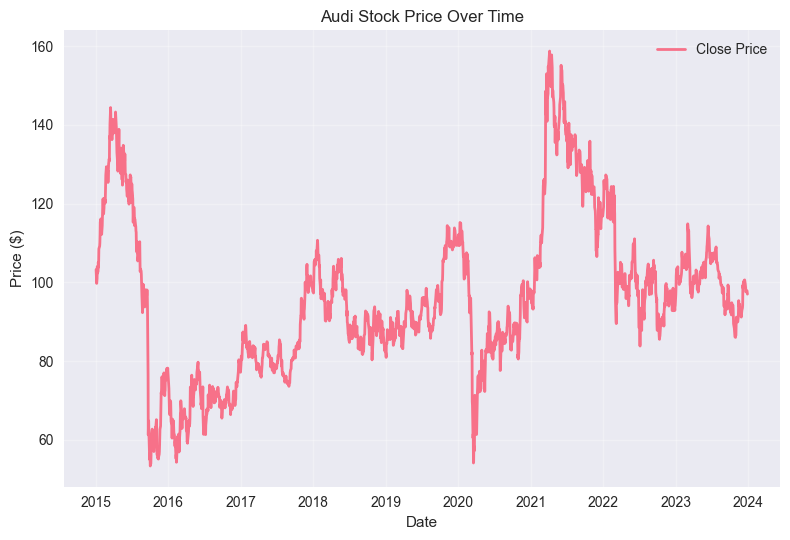

In [173]:
# Stock Price Over Time
plt.Figure(figsize=(15,10))
plt.plot(stock_data["Close"],label="Close Price",linewidth=2)
plt.title("Audi Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

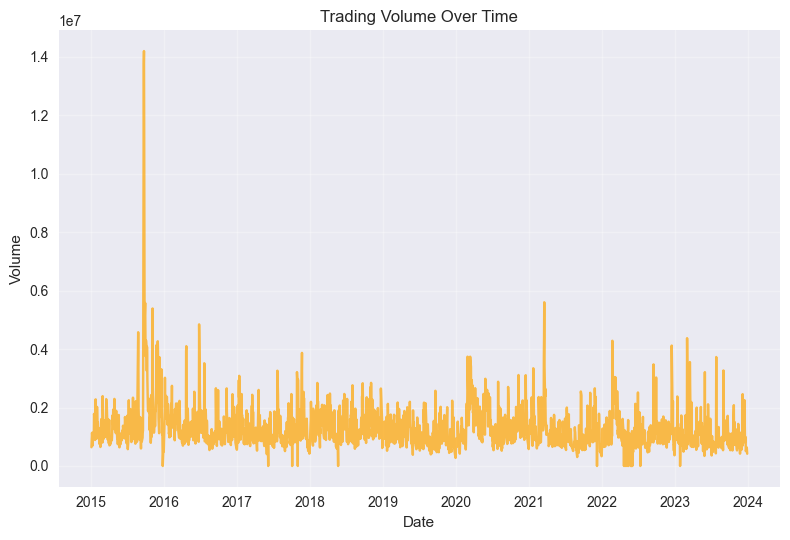

In [174]:
# Volume Traded
plt.Figure(figsize=(14,7))
plt.plot(stock_data["Volume"],color="orange",alpha=0.7)
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

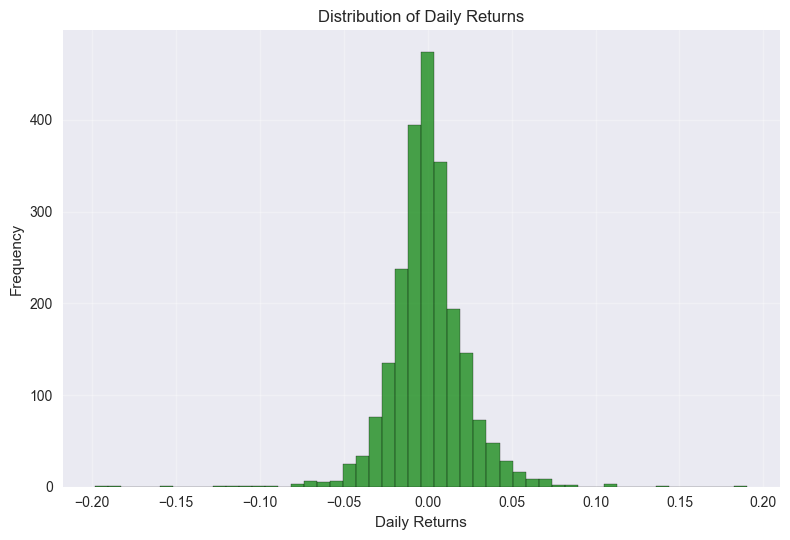

In [175]:
# Daily Returns
daily_returns = stock_data["Close"].pct_change().dropna()
plt.hist(daily_returns,bins=50,color="green",alpha=0.7,edgecolor="black")
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

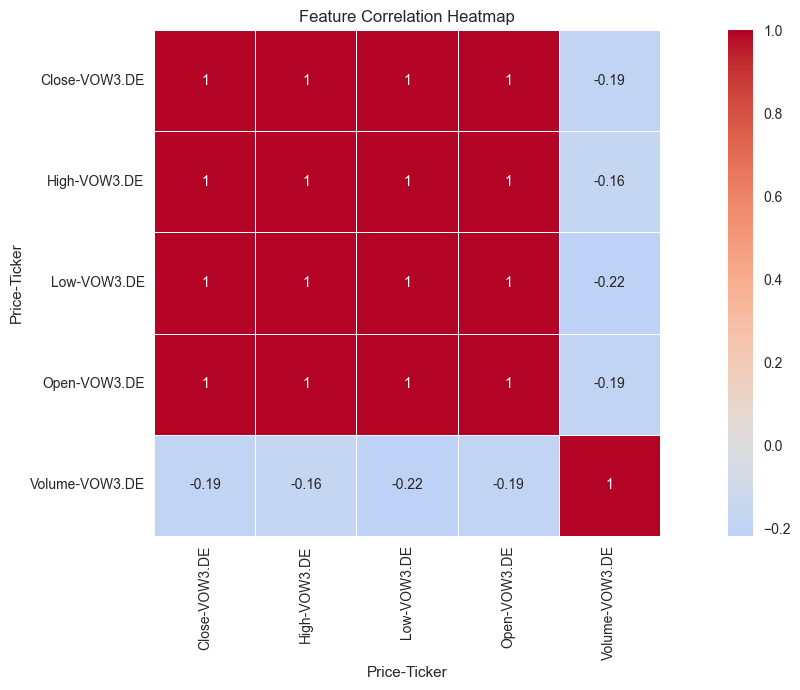

In [176]:
# Correlation HeatmMap
plt.figure(figsize=(14,7))
# Calculate correlation Matrix
correlation_matrix = stock_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",center=0,
            square=True,linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

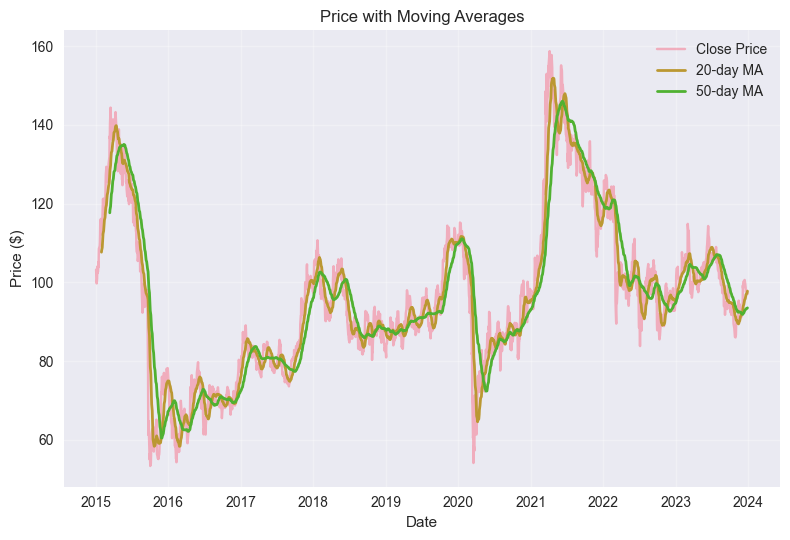

In [177]:
# Moving Averages
plt.Figure(figsize=(14,7))
plt.plot(stock_data["Close"],label="Close Price",alpha=0.5)
plt.plot(stock_data["Close"].rolling(window=20).mean(),label="20-day MA",linewidth=2)
plt.plot(stock_data["Close"].rolling(window=50).mean(),label="50-day MA",linewidth=2)
plt.title("Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

Feature Engineering

In [178]:
def create_features(df):
    # Create technical indicators and features for stock prediction

    df = df.copy()

    # Technical Indicators
    df["SMA_20"] = df["Close"].rolling(window=20).mean() # Simple moving average 20 days
    df["SMA_50"] = df["Close"].rolling(window=50).mean() # Simple moving average 50 days
    df["EMA_12"] = df["Close"].ewm(span=12).mean() # Exponential moving average 12 days
    df["EMA_26"] = df["Close"].ewm(span=26).mean() # Exponential moving average 26 days

    # Volatility
    df["Volatility"] = df["Close"].rolling(window=20).std() # 20-day volatility

    # Price Rate of Change
    df["ROC"] = df["Close"].pct_change(periods=10) # 10-day rate of change

    # High-Low Percentage
    df["Pct_Change"] = df["Close"].pct_change()

    # Lag features
    df["Close_Lag_1"] = df["Close"].shift(1)
    df["Close_Lag_5"] = df["Close"].shift(5)
    df["Close_Lag_10"] = df["Close"].shift(10)

    # Volume features
    df["Volume_Change"] = df["Volume"].pct_change()

    # Drop NaN values created by rolling windows and shifts
    df = df.dropna()


    return df

In [179]:
# Apply feature engineering
print("Creating features........")
featured_data = create_features(stock_data)

# Define features (X) and target (y)
# We'll predict the next's day's closing price
featured_data["Target"] = featured_data["Close"].shift(-1)
featured_data = featured_data.dropna()

# Select features for modelling
feature_columns = ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 
                   'EMA_12', 'EMA_26', 'Volatility', 'ROC', 
                   'Pct_Change', 'Close_Lag_1', 'Close_Lag_5', 'Close_Lag_10', 
                   'Volume_Change']

X = featured_data[feature_columns]
y = featured_data["Target"]

print(f"Final dataset shape: {X.shape}")
print(f"Feature Columns: {feature_columns}")

Creating features........
Final dataset shape: (2237, 15)
Feature Columns: ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26', 'Volatility', 'ROC', 'Pct_Change', 'Close_Lag_1', 'Close_Lag_5', 'Close_Lag_10', 'Volume_Change']


Data Splitting

In [180]:
# Split the data into training and testing sets (80-20 split)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

Data Scaling

In [181]:
X_train = np.clip(X_train,-1e6,1e6)
X_test = np.clip(X_test,-1e6,1e6)

In [182]:
print(np.isinf(X_train).sum().sum(),"Infinite values in X_train")
print(np.isnan(X_train).sum().sum(),"NaN values in X_train")

print(np.isinf(X_test).sum().sum(),"Infinite values in X_test")
print(np.isnan(X_test).sum().sum(),"NaN values in X_test")

0 Infinite values in X_train
0 NaN values in X_train
0 Infinite values in X_test
0 NaN values in X_test


In [183]:
mask_train = np.isfinite(X_train).all(axis=1)
mask_test = np.isfinite(X_test).all(axis=1)

X_train = X_train[mask_train]
X_test = X_test[mask_test]

In [184]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1789
Testing set size: 448


Model Comaprison and Training

In [190]:
# Define all regression models to compare
models = {
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "ElasticNet":ElasticNet(),
    "Decison Tree":DecisionTreeRegressor(random_state=42),
    "Random Forest":RandomForestRegressor(random_state=42),
    #"Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "SVR":SVR(),
    "K-Neighbors":KNeighborsRegressor()
}

# Dictionary to store model performance
results = {}

In [191]:
print("----- Training and evaluating regression models.........")
print("="*50)

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for models that benefit from scaling
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
                'ElasticNet', 'SVR', 'K-Neighbors']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # Train model
    model.fit(X_tr, y_train)
    
    # Make predictions
    y_pred = model.predict(X_te)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'predictions': y_pred
    }
    
    print(f"{name:20} | RMSE: {rmse:8.2f} | MAE: {mae:8.2f} | R²: {r2:8.4f}")

----- Training and evaluating regression models.........
Training Linear Regression...
Linear Regression    | RMSE:     1.77 | MAE:     1.28 | R²:   0.9128
Training Ridge Regression...
Ridge Regression     | RMSE:     1.77 | MAE:     1.28 | R²:   0.9126
Training Lasso Regression...
Lasso Regression     | RMSE:     1.96 | MAE:     1.43 | R²:   0.8932
Training ElasticNet...
ElasticNet           | RMSE:     2.15 | MAE:     1.61 | R²:   0.8705
Training Decison Tree...
Decison Tree         | RMSE:     3.22 | MAE:     2.49 | R²:   0.7100
Training Random Forest...
Random Forest        | RMSE:     2.04 | MAE:     1.49 | R²:   0.8839
Training SVR...
SVR                  | RMSE:     2.37 | MAE:     1.58 | R²:   0.8432
Training K-Neighbors...
K-Neighbors          | RMSE:     3.15 | MAE:     2.22 | R²:   0.7220


Post-Training Visualization

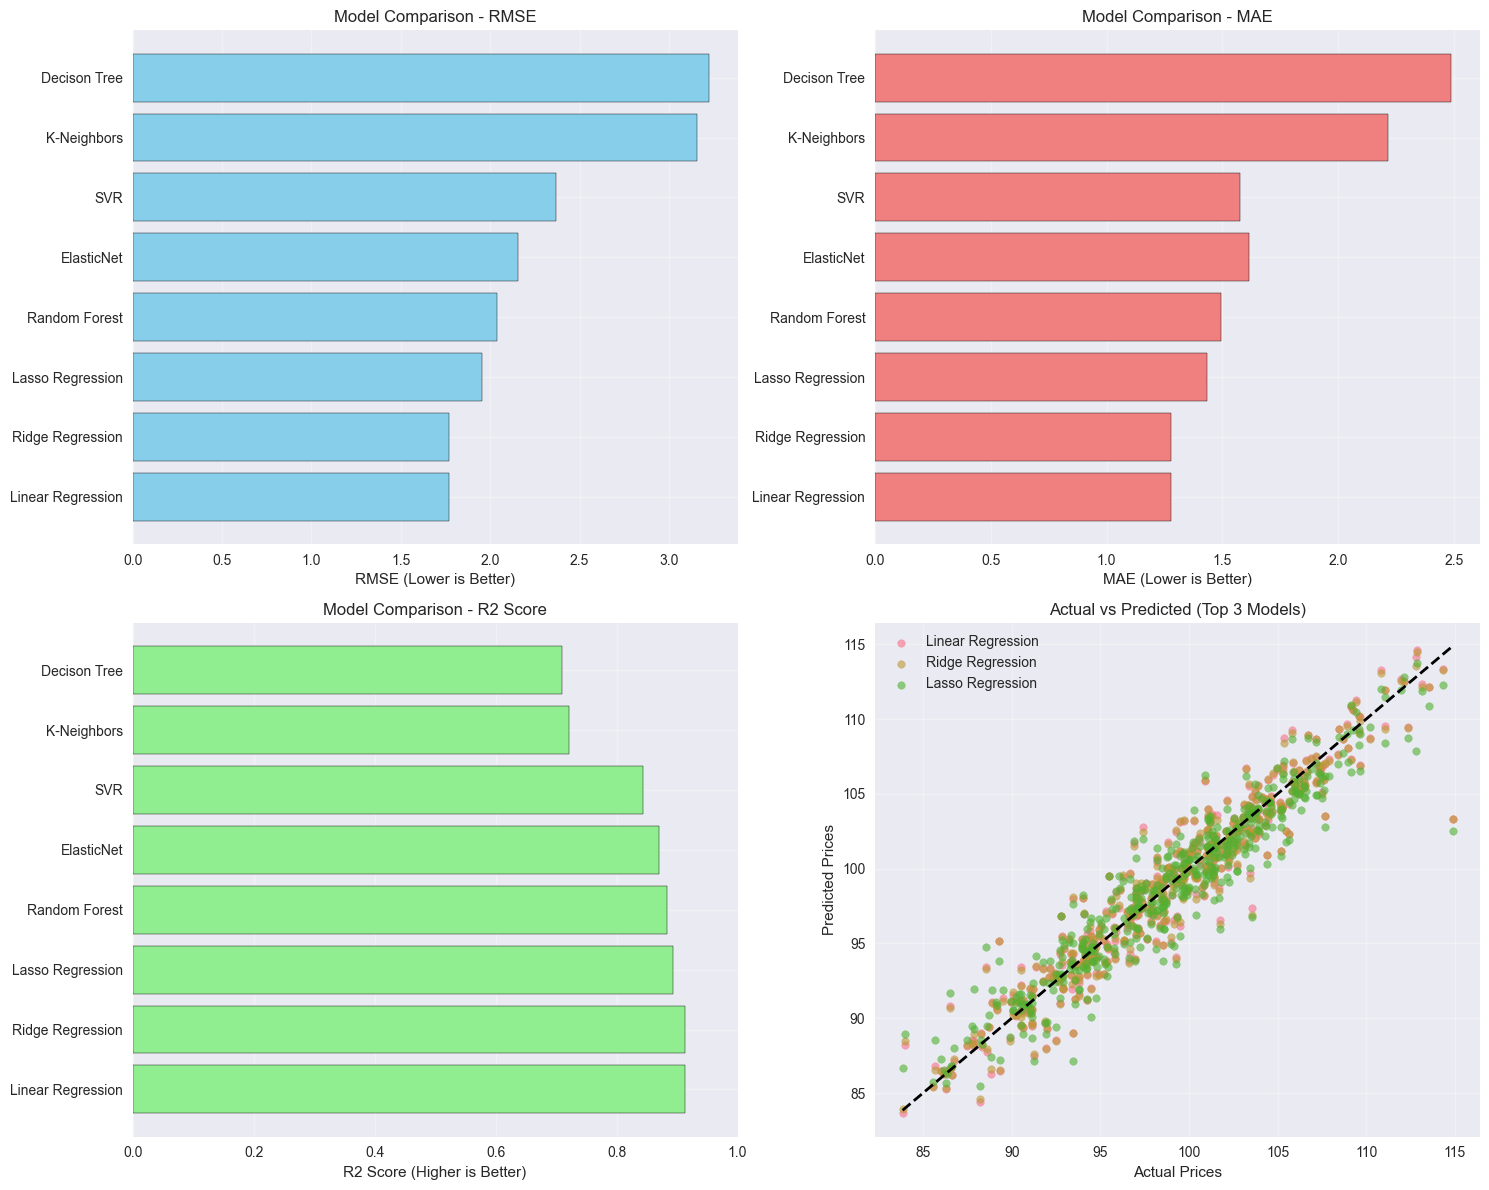

Top 3 Performing Models:
               Model      RMSE       MAE  R2_Score
0  Linear Regression  1.767080  1.279166  0.912752
1   Ridge Regression  1.768844  1.277878  0.912577
2   Lasso Regression  1.955220  1.434023  0.893184
5      Random Forest  2.038213  1.494072  0.883924
3         ElasticNet  2.152886  1.614510  0.870495


In [203]:
# Create comparison DataFrame
results_df = pd.DataFrame({
    "Model":list(results.keys()),
    "RMSE":[results[model]["rmse"] for model in results],
    "MAE":[results[model]["mae"] for model in results],
    "R2_Score":[results[model]["r2"] for model in results]
})

# Sort by RMSE (lower is better)
results_df = results_df.sort_values(by="RMSE")

# %%
# Plot model comparison
fig,axes = plt.subplots(2,2,figsize=(15,12))

# Plot 1: RMSE Comparison
axes[0,0].barh(results_df["Model"],results_df["RMSE"],color="skyblue",edgecolor="black")
axes[0,0].set_xlabel("RMSE (Lower is Better)")
axes[0,0].set_title("Model Comparison - RMSE")
axes[0,0].grid(True,alpha=0.3)

# %%
# Plot 2: MAE Comparison
axes[0,1].barh(results_df["Model"],results_df["MAE"],color="lightcoral",edgecolor="black")
axes[0,1].set_xlabel("MAE (Lower is Better)")
axes[0,1].set_title("Model Comparison - MAE")
axes[0,1].grid(True,alpha=0.3)

# %%
# Plot 3: R2 Score Comparison
axes[1,0].barh(results_df["Model"],results_df["R2_Score"],color="lightgreen",edgecolor="black")
axes[1,0].set_xlabel("R2 Score (Higher is Better)")
axes[1,0].set_title("Model Comparison - R2 Score")
axes[1,0].set_xlim(0,1)
axes[1,0].grid(True,alpha=0.3)

# %%
# Plot 4: Actual vs Predicted for top 3 models
top_3_models = results_df.head(3)["Model"].values
for i,model_name in enumerate(top_3_models):
    y_pred = results[model_name]["predictions"]
    axes[1,1].scatter(y_test,y_pred,alpha=0.6,label=f"{model_name}",s=30)

axes[1,1].plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"k--",lw=2)
axes[1,1].set_xlabel("Actual Prices")
axes[1,1].set_ylabel("Predicted Prices")
axes[1,1].set_title("Actual vs Predicted (Top 3 Models)")
axes[1,1].legend()
axes[1,1].grid(True,alpha=0.3)

plt.tight_layout()
plt.show()

print("Top 3 Performing Models:")
print(results_df.head())

Hyperparameter Tuning for the best model

In [205]:
# Select the best model based on RMSE
best_model_name = results_df.iloc[0]["Model"]
best_model = results[best_model_name]["model"]

print(f"Best Model: {best_model_name}")
print(f"Initial RMSE: {results[best_model_name]["rmse"]:.4f}")
print(f"Initial R2 Score: {results[best_model_name]["r2"]:.4f}")

Best Model: Linear Regression
Initial RMSE: 1.7671
Initial R2 Score: 0.9128


In [207]:
# Define hyperparamter grids for different models
param_grids = {
    "Random Forest":{
        "n_estimators":[50,100,200],
        "max_depth":[None,10,20,30],
        "min_samples_split":[2,5,10],
        "min_samples_leaf":[1,2,4]
    },
    "Gradient Boosting":{
        "n_estimators":[50,100,200],
        "learning_rate":[0.01,0.1,0.2],
        "max_depth":[3,4,5],
        "min_samples_split":[2,5]
    },
    "Decision Tree":{
        "max_depth":[None,10,20,30],
        "min_samples_split":[2,5,10],
        "min_samples_leaf":[1,2,4]
    },
    "Ridge Regression":{
        "alpha":[0.1,1.0,10.0,100.0]
    },
    "Lasso Regression":{
        "alpha":[0.1,1.0,10.0,100.0]
    },
    "ElasticNet":{
        "alpha":[0.1,1.0,10.0],
        "l1_ratio":[0.2,0.5,0.8]
    },
    "SVR":{
        "C":[0.1,1,10,100],
        "gamma":["scale","auto",0.1,0.01],
        "kernel":["rbf","linear"]
    },
    "K-Neighbors":{
        "n_neighbors":[3,5,7,9,11],
        "weights":["uniform","distance"],
        "metric":["euclidean","manhattan"]
    }
}

In [208]:
# Perform hyperparameter tuning if parameters are defined for the best model
if best_model_name in param_grids:
    print(f"Performing Hyperparameters Tuning for {best_model_name}..........")

    # Use appropriate data (scaled or unscaled)
    if best_model_name in ["Linear Regression","Ridge Regression","Lasso Regression","ElasticNet","SVR","K-Neighbors"]:
        X_tr,X_te = X_train_scaled,X_test_scaled

    else:
        X_tr,X_te = X_train,X_test


    # Grid search with cross-validation
    grid_search = GridSearchCV(
        best_model,
        param_grids[best_model_name],
        cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_tr,y_train)

    # Get best model and parameters
    tuned_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make preddictions with tuned model
    y_pred_tuned = tuned_model.predict(X_te)

    # Calculate metrics for tuned model
    mse_tuned = mean_squared_error(y_test,y_pred_tuned)
    rmse_tuned = np.sqrt(mse_tuned)
    r2_tuned = r2_score(y_test,y_pred_tuned)

    print(f"Best Parameters: {best_params}")
    print(f"Tuned Model RMSE: {rmse_tuned:.4f}")
    print(f"Tuned Model R2 Score: {r2_tuned:.4f}")
    print(f"Improvement in RMSE: {results[best_model_name]["rmse"] - rmse_tuned:.4f}")

    # Update the best model
    best_model = tuned_model

else:
    print(f"No Hyperparameter tuning defined for {best_model_name}")
    tuned_model = best_model

No Hyperparameter tuning defined for Linear Regression


Final Model Evaluation and Visualization